In [819]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('./data/tradelog_IS.csv', index_col = 0)

In [820]:
dg = pd.read_csv('./data/aux_data_IS.csv',index_col=0)

In [821]:
df = pd.merge(df,dg,left_index=True, right_index=True)
df = df.dropna()

In [822]:
#create W/L labels, explantory variables
df['target'] = (df['PnL'] > 0).astype(int)
# # 1 hour
# df['momentum'] = df['open_price'].rolling(window = 12).mean() - df['open_price'].rolling(window = 36).mean()
# df['shortterm_momentum'] = df['open_price'].rolling(window = 3).mean() - df['open_price'].rolling(window = 12).mean()
# df['longterm_momentum'] = df['open_price'].rolling(window = 76).mean() - df['open_price'].rolling(window = 288).mean()
# df['extralongterm_momentum'] = df['open_price'].rolling(window = 288).mean() - df['open_price'].rolling(window = 1440).mean()

# df['percent2MA'] = (df['open_price'] - df['open_price'].rolling(window = 288).mean())/df['open_price'].rolling(window = 288).mean()
df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.hour.astype(int) *12 + pd.to_datetime(df['open_time']).dt.minute.astype(int)
# df['open_time_fmt'] = pd.to_datetime(df['open_time']).dt.strftime("%H:%M:%S")

In [823]:
# most basic decision tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

input = df[['extralongterm_momentum','longterm_momentum','dir','parkinson_volatility']]

data, x_test, target, y_test = train_test_split( input,df['target'], test_size=0.50,random_state=42)

clf = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 15)
clf = clf.fit(data, target)
y_predict = clf.predict(x_test)
accuracy_score(y_predict,y_test)

0.6895647614053487

In [824]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=15, random_state=0)
rf.fit(data, target)
y_predict = rf.predict(x_test)
accuracy_score(y_predict,y_test)

0.7577346617724174

In [837]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=4, max_iter=3000).fit(data, target)
# y_predict = clf.predict_proba(x_test)
# accuracy_score(y_predict,y_test)
# clf.score(x_test,y_test)


In [838]:
y_predict = clf.predict(x_test)
accuracy_score(y_predict,y_test)
# y_predict

0.5794441531200839

In [827]:
# plt.scatter(df['shortterm_momentum'],df['parkinson_volatility'], c = df['target'])

(array([ 10.,  77.,  94., 169., 257., 272., 239., 320., 221., 245., 256.,
        176., 180., 154.,  97.,  86., 109., 107.,  78., 103.,  97.,  35.,
         18.,  77.,  14.,  43.,  16.,  62.,  14.,  34.,  23.,   0.,  40.,
          0.,   4.,   3.,  23.,   0.,  13.,  16.,   0.,   0.,   1.,   0.,
         18.,   0.,   0.,   0.,   6.,   7.]),
 array([0.00166802, 0.00231744, 0.00296686, 0.00361628, 0.00426569,
        0.00491511, 0.00556453, 0.00621395, 0.00686337, 0.00751279,
        0.0081622 , 0.00881162, 0.00946104, 0.01011046, 0.01075988,
        0.01140929, 0.01205871, 0.01270813, 0.01335755, 0.01400697,
        0.01465638, 0.0153058 , 0.01595522, 0.01660464, 0.01725406,
        0.01790348, 0.01855289, 0.01920231, 0.01985173, 0.02050115,
        0.02115057, 0.02179998, 0.0224494 , 0.02309882, 0.02374824,
        0.02439766, 0.02504707, 0.02569649, 0.02634591, 0.02699533,
        0.02764475, 0.02829417, 0.02894358, 0.029593  , 0.03024242,
        0.03089184, 0.03154126, 0.03219067, 0.

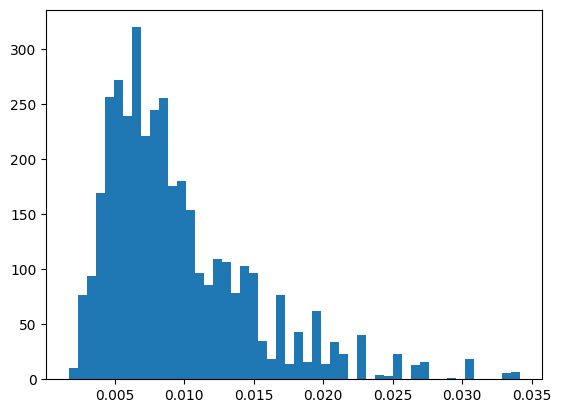

In [828]:
import matplotlib.pyplot as plt
plt.hist(df['parkinson_volatility'],bins = 50)

In [829]:
y_predict = clf.predict(x_test)
accuracy_score(y_predict,y_test)

0.5904562139486104

In [830]:
# tree.plot_tree(clf)
import joblib 
joblib.dump(clf,'DT.joblib')

['DT.joblib']

In [831]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=input.columns,  
#                    filled=True)